In [1]:
import numpy as np
import pandas as pd
import statsrat as sr
from statsrat import latent_cause as lc
#from statsrat.expr.predef.pvl_iti import import extinction, blocking
from statsrat.expr.predef.pvl_no_iti import extinction, blocking
from statsrat.expr.predef.kitten import lrn_pred

In [2]:
print_probs = False # Should model log_lik, prior, phi etc. be printed?
print(lc.pars)
model = lc.model()
trials = extinction.make_trials('experimental')
#trials = lrn_pred.make_trials()
ds = model.simulate(trials, par_val = [1, 2, 0.1, 2, 1])

            min   max  default  \
gamma       0.0  10.0      2.0   
alpha       0.0  40.0      0.5   
tilde_tau   0.0  40.0      2.0   
tilde_n     0.0  40.0      2.0   
resp_scale  0.0  10.0      1.0   

                                                  description  
gamma       decay rate for exponential SCRP; higher -> fav...  
alpha       concentration parameter; higher -> tend to inf...  
tilde_tau   prior hyperparameter for eta (log-odds in Bern...  
tilde_n     prior value for n (sample size for each latent...  
resp_scale         scales softmax/logistic response functions  


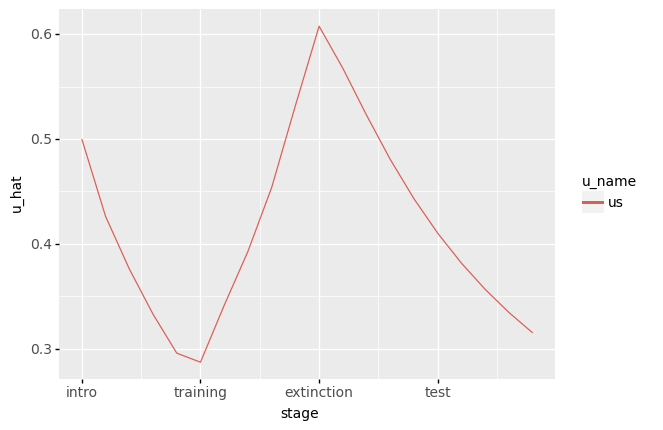

<ggplot: (306610276)>

In [4]:
#sr.learn_plot(ds, var = 'N')
sr.learn_plot(ds, var = 'u_hat')
# *** MAKE IT SO THAT u_hat CAN BE ZERO AT FIRST,
# I.E. MAKE IT SO THAT THE PRIOR ON y CAUSES INITIAL PREDICTIONS TO BE SMALL ***
#sr.learn_plot(ds, var = 'u_hat', sel = {'t': ds['ex'].isin(['a.x', 'a.y'])*(ds['stage'] == 0)})

In [46]:
if print_probs:
    print('phi')
    print(ds['phi'].loc[{'t': range(5), 'z_name': range(3)}].values)
    print('\n E_log_prior')
    print(np.exp(ds['E_log_prior'].loc[{'t': range(5), 'z_name': range(3)}]).values)
    print('\n E_log_lik_x')
    print(np.exp(ds['E_log_lik_x'].loc[{'t': range(5), 'z_name': range(3)}]).values)
    print('\n E_log_lik_y')
    print(np.exp(ds['E_log_lik_y'].loc[{'t': range(5), 'z_name': range(3)}]).values)

In [48]:
oat_result = sr.perform_oat(model, blocking, verbose = True)

Maximizing OAT score.
[20. 20.  5. 20.  5.]
[33.33266667 20.          5.         20.          5.        ]
[ 6.66733333 20.          5.         20.          5.        ]
[20.         33.33266667  5.         20.          5.        ]
[20.          6.66733333  5.         20.          5.        ]
[20.         20.          8.33266667 20.          5.        ]
[20.         20.          1.66733333 20.          5.        ]
[20.         20.          5.         33.33266667  5.        ]
[20.         20.          5.          6.66733333  5.        ]
[33.33266667  6.66733333  5.         20.          5.        ]
[ 6.66733333  6.66733333  5.         20.          5.        ]
[20.          6.66733333  8.33266667 20.          5.        ]
[20.          6.66733333  1.66733333 20.          5.        ]
[20.          6.66733333  5.         33.33266667  5.        ]
[20.          6.66733333  5.          6.66733333  5.        ]
[33.33266667 33.33266667  5.         20.          5.        ]
[ 6.66733333 33.33266667  

[18.51859259 11.11155556  1.63120775 18.73443828  5.        ]
[18.51859259 11.11155556  1.61558587 18.98442578  5.        ]
[18.51859259 11.11155556  1.61558587 18.73443828  5.        ]
[18.51859259 11.11155556  1.58434212 19.23441328  5.        ]
[18.51859259 11.11155556  1.55309837 19.23441328  5.        ]
[18.51859259 11.11155556  1.56872025 19.17191641  5.        ]
[18.51859259 11.11155556  1.599964   19.04692266  5.        ]
[18.51859259 11.11155556  1.57653118 19.14066797  5.        ]
[18.51859259 11.11155556  1.57653118 18.89068047  5.        ]
[18.51859259 11.11155556  1.58238939 19.14848008  5.        ]
[17.51864259 11.11155556  1.58238939 19.14848008  5.        ]
[17.51864259 10.11160556  1.58238939 19.14848008  5.        ]
[18.51859259 12.11150556  1.58238939 19.14848008  5.        ]
[17.76863009 10.61158056  1.58238939 19.14848008  5.        ]
[18.01861759 11.11155556  1.58238939 19.14848008  5.        ]
[17.51864259 10.61158056  1.58238939 19.14848008  5.        ]
[17.0186

[1.01946759e+00 1.00000000e-03 9.99900000e+00 3.77188912e+01
 5.00000000e+00]
[ 1.01946759  4.44522222  9.999      39.999       5.        ]
[1.01946759e+00 1.00000000e-03 9.99900000e+00 3.84789275e+01
 5.00000000e+00]
[1.01946759e+00 1.00000000e-03 9.99900000e+00 3.84789275e+01
 5.00000000e+00]
[1.01946759e+00 1.00000000e-03 9.99900000e+00 3.88589456e+01
 5.00000000e+00]
[ 1.01946759  2.22311111  9.999      39.999       5.        ]
[1.01946759e+00 1.00000000e-03 9.99900000e+00 3.92389637e+01
 5.00000000e+00]
[1.01946759e+00 1.00000000e-03 9.99900000e+00 3.92389637e+01
 5.00000000e+00]
[1.01946759e+00 1.00000000e-03 9.99900000e+00 3.94289728e+01
 5.00000000e+00]
[ 1.01946759  1.11205556  9.999      39.999       5.        ]
[1.01946759e+00 1.00000000e-03 9.99900000e+00 3.96189819e+01
 5.00000000e+00]
[1.01946759e+00 1.00000000e-03 9.23907774e+00 3.96189819e+01
 5.00000000e+00]
[2.03284928e+00 1.00000000e-03 9.23907774e+00 3.96189819e+01
 5.00000000e+00]
[6.08590224e-03 1.00000000e-03 9.9

/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__i

[6.08590224e-03 1.00000000e-03 9.99900000e+00 3.96189819e+01
 5.00000000e+00]
[1.00000000e-03 1.00000000e-03 9.99900000e+00 3.96189819e+01
 5.00000000e+00]


/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__i

[5.12776747e-01 1.00000000e-03 9.99900000e+00 3.96189819e+01
 5.00000000e+00]
[5.12776747e-01 1.00000000e-03 9.99900000e+00 3.96189819e+01
 5.00000000e+00]
[6.08590224e-03 8.13612581e+00 9.99900000e+00 3.96189819e+01
 5.00000000e+00]
[ 0.45803734  8.13612581  9.999      39.61898187  5.        ]
[1.00000000e-03 1.00000000e-03 9.99900000e+00 3.96189819e+01
 5.00000000e+00]


/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__i

[ 0.23206162  6.10234435  9.999      39.61898187  5.        ]
[6.08590224e-03 4.06856290e+00 9.99900000e+00 3.96189819e+01
 5.00000000e+00]
[ 0.23206162  8.13612581  9.999      39.61898187  5.        ]
[1.00000000e-03 4.06856290e+00 9.99900000e+00 3.96189819e+01
 5.00000000e+00]


/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__i

[ 0.11907376  7.11923508  9.999      39.61898187  5.        ]
[1.00000000e-03 5.08545363e+00 9.99900000e+00 3.96189819e+01
 5.00000000e+00]


/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__i

[ 0.06257983  6.61078972  9.999      39.61898187  5.        ]
[6.08590224e-03 6.10234435e+00 9.99900000e+00 3.96189819e+01
 5.00000000e+00]
[ 0.06257983  7.62768044  9.999      39.61898187  5.        ]
[1.00000000e-03 6.61078972e+00 9.99900000e+00 3.96189819e+01
 5.00000000e+00]


/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__i

[3.43328668e-02 7.37345776e+00 9.99900000e+00 3.96189819e+01
 5.00000000e+00]
[3.43328668e-02 9.40723921e+00 9.99900000e+00 3.96189819e+01
 5.00000000e+00]
[ 0.04845635 11.05968664  9.999      39.61898187  5.        ]
[2.02093845e-02 1.18223547e+01 9.99900000e+00 3.96189819e+01
 5.00000000e+00]
[1.31476434e-02 1.40468031e+01 9.99900000e+00 3.96189819e+01
 5.00000000e+00]
[ 0.05551809 16.97036399  9.999      39.61898187  5.        ]
[2.02093845e-02 1.99574805e+01 9.99900000e+00 3.96189819e+01
 5.00000000e+00]
[6.08590224e-03 2.44063774e+01 9.99900000e+00 3.96189819e+01
 5.00000000e+00]
[1.00000000e-03 1.70339197e+01 9.99900000e+00 3.96189819e+01
 5.00000000e+00]


/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__i

[3.60983021e-02 1.69862529e+01 9.99900000e+00 3.96189819e+01
 5.00000000e+00]
[ 0.04316004 22.89693025  9.999      39.61898187  5.        ]
[2.06507434e-02 1.62593349e+01 9.99900000e+00 3.96189819e+01
 5.00000000e+00]
[3.65396610e-02 1.32881073e+01 9.99900000e+00 3.96189819e+01
 5.00000000e+00]
[2.42919536e-02 1.82901372e+01 9.99900000e+00 3.96189819e+01
 5.00000000e+00]
[8.84439487e-03 1.75632192e+01 9.99900000e+00 3.96189819e+01
 5.00000000e+00]
[1.00000000e-03 1.78517024e+01 9.99900000e+00 3.96189819e+01
 5.00000000e+00]


/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__i

[5.20318459e-03 1.55324169e+01 9.99900000e+00 3.96189819e+01
 5.00000000e+00]
[1.00000000e-03 1.68363012e+01 9.99900000e+00 3.96189819e+01
 5.00000000e+00]


/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__i

[1.38372665e-02 1.64035765e+01 9.99900000e+00 3.96189819e+01
 5.00000000e+00]
[1.74784768e-02 1.84343788e+01 9.99900000e+00 3.96189819e+01
 5.00000000e+00]
[8.27200765e-03 1.62579074e+01 9.99900000e+00 3.96189819e+01
 5.00000000e+00]
[3.27913598e-03 1.74175501e+01 9.99900000e+00 3.96189819e+01
 5.00000000e+00]


/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide


[1.00000000e-03 1.79245369e+01 9.99900000e+00 3.96189819e+01
 5.00000000e+00]


/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__i

[3.85152320e-03 1.87228619e+01 9.99900000e+00 3.96189819e+01
 5.00000000e+00]


/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__i

In [5]:
trials = blocking.make_trials('experimental')
ds = model.simulate(trials, par_val = [0.001, 0.001, 9.99, 4, 5])

/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:189: RuntimeWarning: invalid value encountered in true_divide
/Users/sam/Dropbox/Research/Modeling/PhD thesis/statsrat/statsrat/latent_cause/__init__.py:206: RuntimeWarning: invalid value encountered in true_divide
